# M-PESA prediction
<img src="Charts/MPesaFinance.png" alt="Mpesa file" width="500" height="450">
<h2> Case study </h2>

<i><h4>Introduction</i></h4>

* M-Pesa is a mobile money service launched by Safaricom, Kenya’s leading telecommunications company, in 2007. It has revolutionized financial transactions, allowing users to send, receive, deposit, and withdraw money using their mobile phones. M-Pesa has played a significant role in financial inclusion, particularly for unbanked populations.

<i><h4>How M-Pesa Works</h4></i>

* M-Pesa enables users to perform transactions via USSD codes or the M-Pesa app. Users register with Safaricom and link their mobile   numbers to an M-Pesa account. Key services include:
- Depositing money at M-Pesa agent shops.
- Sending money to other users and non-users.
- Withdrawing cash from agents or ATMs.
- Paying bills (electricity, water, internet, school fees, etc.).
- Merchant payments through Lipa na M-Pesa.
- Accessing micro-loans and savings via M-Shwari and KCB M-Pesa.
- Overdraft services using Fuliza.<br>

<i><h4>Challenges and Risks</i></h4>

* High transaction costs: Some users find M-Pesa charges expensive for frequent transactions.
* less finance monitoring and alert on overspending money
* Alternative option on cheaper money spending areas

<i><h4>Solution</i></h4>

* Model a system using m-pesa stament to predict your spending
* provide an alternative of a cheaper spending activity
* provide an alert to user when the spending of money is high(email)

In [1]:
import pandas as pd
import numpy as np
import PyPDF2
import pikepdf
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from tabula.io import read_pdf 
from dateutil import parser 
from sqlalchemy import create_engine
import mysql.connector

In [2]:
# decrepting the file pdf
input_path = "/Users/briankimanzi/Downloads/Mpesa pdfs/Statement_All_Transactions_20240901_20250301.pdf"
output_path = "/Users/briankimanzi/Downloads/Mpesa pdfs/Tracking.pdf"
password = "102030"

with pikepdf.open(input_path, password=password) as pdf:
    pdf.save(output_path)
path = output_path

In [3]:
# getting number of pages on the pdf
with open(path, 'rb') as file:
    pdf_reader = PyPDF2.PdfReader(file)
    num_pages = len(pdf_reader.pages)

In [4]:
# extracting data from mpesa pages
def get_data():
    for page_number in range(1, num_pages+1):
        if page_number == 1:
            df =read_pdf(path, pages=page_number)
            data=df[1]
            return_df =data
        else:
            df = read_pdf(path, pages=page_number)
            data=df[0]

        if page_number != 1:
            return_df = pd.concat([return_df, data])

    return return_df.reset_index(drop=True)
working_data = get_data()

Failed to import jpype dependencies. Fallback to subprocess.
No module named 'jpype'


In [5]:
working_data

,Receipt No,Completion Time,Details,Transaction Status,Paid in,Withdraw\rn,Balance,Unnamed: 0
0,TC17XS3U67,2025-03-01 15:55:18,Customer Transfer to 254718***450 -\rGideon Ki...,COMPLETED,0.00,80.00,27.00,NaN
1,TC14XHM64C,2025-03-01 14:49:55,M-Shwari Deposit,COMPLETED,0.00,"1,000.00",107.00,NaN
2,TC11XF54B3,2025-03-01 14:34:40,Funds received from 0706***880 - sheila\rmercy...,COMPLETED,"1,100.00",0.00,"1,107.00",NaN
3,TC13WSE6N5,2025-03-01 12:11:53,Pay Bill Online to 4076749 - TINGG Acc.\r25410...,COMPLETED,0.00,10.00,7.00,NaN
4,TBS1THWSOL,2025-02-28 17:50:41,Customer Transfer to 254716***061 -\rNAOMI NYA...,COMPLETED,0.00,10.00,17.00,NaN
...,...,...,...,...,...,...,...,...
269,TAB3U80KYL,2025-01-11 20:34:49,M-Shwari Withdraw,COMPLETED,50.0,0.0,79.0,NaN
270,TAA7PUAYUX,2025-01-10 20:19:56,Pay Bill Charge,COMPLETED,0.0,2.0,29.0,NaN
271,TAA7PUAYUX,2025-01-10 20:19:56,Pay Bill Online to 4093275 - Direct Pay\rLimit...,COMPLETED,0.0,20.0,31.0,NaN
272,TAA4PU1I32,2025-01-10 20:18:40,M-Shwari Withdraw,COMPLETED,50.0,0.0,51.0,NaN


In [6]:
# Reading other dataset
Data1 = pd.read_csv('/Users/briankimanzi/Documents/programmingLanguages/PythonProgramming/JupyterAI/Mpesa prediction/DataSet/katra.csv')
Data2 = pd.read_csv('/Users/briankimanzi/Documents/programmingLanguages/PythonProgramming/JupyterAI/Mpesa prediction/DataSet/Nashipae.csv')

In [7]:
Data1

,Receipt,transaction_Day,Year,Month,Date,Weekday,Hour,Minute,Seconds,Transaction_type,Transaction_party,Transaction_amount,paid_in_or_Withdraw,Balance
0,TD71R8CU5T,68,2025,4,7,0,12,24,25,AIRTIME PURCHASE,AIRTIME,14.0,WITHDRAW,0.71
1,TD48BNDSIK,67,2025,4,4,4,5,10,29,PAY BILL,SAFARICOM HOME,3699.0,WITHDRAW,96822.71
2,TCU0NDJPKK,66,2025,3,30,6,7,13,23,PAY BILL CHARGES,TRANSACTION COST,10.0,WITHDRAW,27.71
3,TCU0NDJPKK,66,2025,3,30,6,7,13,23,PAY BILL,KPLC PREPAID,1000.0,WITHDRAW,37.71
4,TCS0HGRZ5U,65,2025,3,28,4,20,9,27,AIRTIME PURCHASE,AIRTIME,5.0,WITHDRAW,1037.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,SJC9SXS74T,2,2024,10,12,5,11,49,43,PAY BILL CHARGES,TRANSACTION COST,5.0,WITHDRAW,126.71
131,SJC9SXS74T,2,2024,10,12,5,11,49,43,PAY BILL,KPLC PREPAID,500.0,WITHDRAW,131.71
132,SJB8QWVJN2,1,2024,10,11,4,19,36,51,RECEIVED FUNDS,SAFIA SOYAN,500.0,PAID IN,631.71
133,SJB2QIB142,1,2024,10,11,4,18,34,48,BUSINESS PAYMENT,CO-OP BANK VIA API,120.0,PAID IN,131.71


In [8]:
Data2

,Receipt,transaction_Day,Year,Month,Date,Weekday,Hour,Minute,Seconds,Transaction_type,Transaction_party,Transaction_amount,paid_in_or_Withdraw,Balance
0,TD349XUJFS,154,2025,4,3,3,18,27,59,BUY GOODS,SAWA SHOP 4,65.0,WITHDRAW,1260.75
1,TD399XA2KP,154,2025,4,3,3,18,26,0,BUY GOODS,MOHAMED DULACHA ALI,120.0,WITHDRAW,1325.75
2,TD359WGPPX,154,2025,4,3,3,18,22,0,BUY GOODS,JOANINA KARIMI RUKARIA 6,70.0,WITHDRAW,1445.75
3,TD359Q25IZ,154,2025,4,3,3,17,53,0,PAY BILL CHARGES,TRANSACTION COST,57.0,WITHDRAW,1515.75
4,TD359Q25IZ,154,2025,4,3,3,17,53,0,PAY BILL,CO- OPERATIVE BANK MONEY TRANSFER,10500.0,WITHDRAW,1572.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,SJ49WDO7A3,1,2024,10,4,4,18,38,59,BUY GOODS,JACKSON MWAURA MUGURO,50.0,WITHDRAW,2330.81
1074,SJ49WC912X,1,2024,10,4,4,18,31,59,BUY GOODS,BK 911 CHICKEN,170.0,WITHDRAW,2380.81
1075,SJ41W9ZSH5,1,2024,10,4,4,18,22,0,BUY GOODS,JUDITH KATHURE MWITI,130.0,WITHDRAW,2550.81
1076,SJ40V94Q5K,1,2024,10,4,4,14,35,59,POCHI LA BIASHARA,MADERINA NYOROKA,50.0,WITHDRAW,2680.81


<h3><i>Data cleaning </i></h3>

In [9]:
# function to remove the commas on the dataset
def remove_comma(x):
    """This function removes commans on the dataset
    parameters: x
    return x
    """
    x = str(x)
    x = x.replace(',', '')
    return x

In [10]:
data = working_data.copy()
data['Paid in'] = data['Paid in'].apply(lambda x: remove_comma(x))
data['Withdraw\rn'] = data['Withdraw\rn'].apply(lambda x : remove_comma(x))
data['Balance'] = data['Balance'].apply(lambda x: remove_comma(x))

In [11]:
# changing data type
data = data.astype({
    'Paid in': float,
    'Withdraw\rn':float,
    'Balance':float
})

In [12]:
# dropping unwanted columns
data.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
# Anonymising the dataset 
def transaction(x):
    x = str(x).strip()
    if x.startswith('Merchant Payment'):
        index = x.find(' - ')+2
        name = x[index:].strip().upper()
        
        return 'BUY GOODS', name

    elif x.startswith('Deposit of funds'):
        index = x.find(' - ')
        name = x[index:].strip().upper()
        
        return 'AGENT DEPOSIT', name

    elif x.startswith('OD Loan Repayment'):
        return 'FULIZA REPAYMENT', 'FULIZA'

    elif x.startswith('OverDraft of Credit Party'):
        return 'FULIZA TAKEN', 'FULiZA'

    elif x.startswith('M-Shwari Deposit'):
        return 'M-SHWARI DEPOSIT FROM M-PESA', 'M-SHWARI'
        
    elif x.startswith('KCB M-PESA Deposit'):
        return 'KCB M-PESA DEPOSIT FROM M-PESA', 'KCB DEPOSIT'

    elif x.startswith('KCB M-PESA Withdraw'):
        return 'KCB M-PESA WITHDRAW FROM M-PESA', 'KCB WITHDRAW'

    elif x.startswith('Customer Transfer'):
        index = x.find(' - ')
        to_search = x[index:]
        last = 1

        for i in range(len(to_search)):
            try:
                int(to_search[i])
                last = i
                
            except:
                v = 10

        name = x[index+last+2:].strip().upper()
        return 'SEND MONEY', name

    elif x.startswith('M-Shwari Withdraw'):
        
        return 'M-SHWARI WITHDRAW FROM M-PESA', 'M-SHWARI WITHDRAW'

    elif x.startswith('Pay Bill'):
        if x.strip() == 'Pay Bill Charge':
            
            return 'PAY BILL CHARGES', 'TRANSACTION COST'
        else:
            index = x.find(' - ')+2
            end = x.lower().find('acc')
            name = x[index:end].strip().upper()
            
            return 'PAY BILL', name

    elif x.startswith('Funds received'):
        index = x.find(' - ')
        to_search = x[index:]
        last = 1

        for i in range(len(to_search)):
            try:
                int(to_search[i])
                last = i
            except:
                v = 10

        name = x[index+last+2:].strip().upper()
        
        return 'RECEIVED FUNDS', name

    elif x.startswith('Customer Payment to Small Business') or x.startswith('Customer Send Money'):
        index = x.find(' - ')
        to_search = x[index:]
        last = 1

        for i in range(len(to_search)):
            try:
                int(to_search[i])
                last = i
            except:
                v = 10

        name = x[index+last+2:].strip().upper()
        
        return 'POCHI LA BIASHARA', name

    elif x.startswith('Airtime Purchase'):
        return 'AIRTIME PURCHASE', 'AIRTIME'

    elif x.startswith('Business Payment From'):
        index = x.find(' - ')
        end = x.lower().find('via')
        to_search = x[index:]
        last = 1
        name = x[index:end].strip().upper()
        return 'FUNDS RECEIVED FROM BUSINESS', name

    elif x.startswith('Customer Transfer of Funds Charge'):
        return 'TRANSACTION COST', 'TRANSACTION COST'
    
    elif x.startswith('Buy Bundles Online'):
        return 'BUNDLES PURCHASE', 'BUNDES PURCHASE'
    
    elif x.startswith('Customer Withdrawal'):
        index = x.find(' - ')
        name = x[index:].strip().upper()
        return 'CASH WITHDRAWAL', name
    
    elif x.startswith('Withdrawal Charge'):
        return 'CASH WITHDRAWAL CHARGES', "TRANSACTION COST"
    
    elif x.startswith('Savings Contribution'):
        return 'TO HUSTLER FUND SAVINGS', 'HUSTLER FUND'
    
    elif x.startswith('Term Loan Disbursement for H- Fund') or x.startswith('Term Loan Disbursement for H-Fund'):
        return 'HUSTLER FUND Disbursement'.upper(), 'HUSTLER FUND'
    
    elif x.startswith('Term Loan Repayment for H- Fund') or x.startswith('Term Loan Repayment for H-Fund'):
        return 'HUSTLER FUND REPAYMENT', 'HUSTLER FUND'
    
    else:
        return 'UNIDENTIFIED', 'UNIDENTIFIED'

In [14]:
data['Details'] = data['Details'].apply(lambda x: x.replace('\r', ' '))

In [15]:
details = list(data['Details'].apply(lambda x: transaction(x)).values)
transactionType = [i[0] for i in details]
TransactionParty = [i[1] for i in details]

In [16]:
working_data.drop("Unnamed: 0", axis=1, inplace=True)

In [17]:
# changing the date format
def change_date(date):
    date = parser.parse(date)
    return (date.year, date.month, date.day, date.weekday(),date.hour, date.minute, date.second)

In [18]:
date = data['Completion Time'].apply(lambda x: change_date(x)).values
Year = [i[0] for i in date]
Month = [i[1] for i in date]
Date = [i[2] for i in date]
Weekday = [i[3] for i in date]
Hour = [i[4] for i in date]
Minute = [i[5] for i in date]
Seconds = [i[6] for i in date]

transactionDay = []

reverseDay = Date.copy()[::-1]
datey = reverseDay[0]

d = 1

for i in reverseDay:
    if i == datey:
        transactionDay.append(d)
    else:
        datey = i
        d += 1
        transactionDay.append(d)

transactionDay.reverse()

In [19]:
receipt = list(data['Receipt No'].values)

In [20]:
paid_in = data['Paid in'].fillna('NAN_VALUE').values

In [21]:
def withdrawAmount(x):
    try:
        if x < 0:
            return -x
        else:
            return x
    except:
        return x

In [22]:
withdraw = list(data['Withdraw\rn'].apply(lambda x: withdrawAmount(x)).values)
withdraw                

[np.float64(80.0),
 np.float64(1000.0),
 np.float64(0.0),
 np.float64(10.0),
 np.float64(10.0),
 np.float64(15.0),
 np.float64(10.0),
 np.float64(0.0),
 np.float64(55.0),
 np.float64(50.0),
 np.float64(13.0),
 np.float64(1000.0),
 np.float64(100.0),
 np.float64(10.0),
 np.float64(15.0),
 np.float64(100.0),
 np.float64(55.0),
 np.float64(60.0),
 np.float64(20.0),
 np.float64(70.0),
 np.float64(50.0),
 np.float64(20.0),
 np.float64(15.0),
 np.float64(20.0),
 np.float64(120.0),
 np.float64(10.0),
 np.float64(0.0),
 np.float64(10.0),
 np.float64(10.0),
 np.float64(240.0),
 np.float64(10.0),
 np.float64(0.0),
 np.float64(35.0),
 np.float64(10.0),
 np.float64(20.0),
 np.float64(10.0),
 np.float64(10.0),
 np.float64(50.0),
 np.float64(7.0),
 np.float64(135.0),
 np.float64(20.0),
 np.float64(0.0),
 np.float64(30.0),
 np.float64(0.0),
 np.float64(10.0),
 np.float64(0.0),
 np.float64(50.0),
 np.float64(0.0),
 np.float64(25.0),
 np.float64(0.0),
 np.float64(40.0),
 np.float64(0.0),
 np.float64(30

In [23]:
transaction_Data = []

for i in range(len(paid_in)):
    try:
        x = float(paid_in[i])
        transaction_Data.append((x, 'PAID IN'))
    except:
        x = float(withdraw[i])
        transaction_Data.append((x, 'WITHDRAW'))

In [24]:
transaction_amount = [i[0] for i in transaction_Data]
paid_in_or_withdraw = [i[1] for i in transaction_Data]

In [25]:
balance =list(data["Balance"].values)

In [26]:
final_data = pd.DataFrame({
    "Receipt":receipt,
    "transaction_Day": transactionDay,
    "Year" : Year,
    "Month" : Month,
    "Date" : Date,
    "Weekday" : Weekday,
    "Hour" : Hour,
    "Minute" : Minute,
    "Seconds" : Seconds,
    "Transaction_type" : transactionType,
    "Transaction_party" : TransactionParty,
    "Transaction_amount" : transaction_amount,
    "paid_in_or_Withdraw" : paid_in_or_withdraw,
    "Balance" : balance
})
final_data.set_index('Receipt', inplace=True)
final_data

,transaction_Day,Year,Month,Date,Weekday,Hour,Minute,Seconds,Transaction_type,Transaction_party,Transaction_amount,paid_in_or_Withdraw,Balance
Receipt,,,,,,,,,,,,,
TC17XS3U67,49,2025,3,1,5,15,55,18,SEND MONEY,GIDEON KIPAMET KAIYIAN,0.0,PAID IN,27.0
TC14XHM64C,49,2025,3,1,5,14,49,55,M-SHWARI DEPOSIT FROM M-PESA,M-SHWARI,0.0,PAID IN,107.0
TC11XF54B3,49,2025,3,1,5,14,34,40,RECEIVED FUNDS,SHEILA MERCY NDUSYA,1100.0,PAID IN,1107.0
TC13WSE6N5,49,2025,3,1,5,12,11,53,PAY BILL,TINGG,0.0,PAID IN,7.0
TBS1THWSOL,48,2025,2,28,4,17,50,41,SEND MONEY,NAOMI NYAMBURA MBURU,0.0,PAID IN,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TAB3U80KYL,2,2025,1,11,5,20,34,49,M-SHWARI WITHDRAW FROM M-PESA,M-SHWARI WITHDRAW,50.0,PAID IN,79.0
TAA7PUAYUX,1,2025,1,10,4,20,19,56,PAY BILL CHARGES,TRANSACTION COST,0.0,PAID IN,29.0
TAA7PUAYUX,1,2025,1,10,4,20,19,56,PAY BILL,DIRECT PAY LIMITED 1,0.0,PAID IN,31.0


In [27]:
# joining all the datasets together
Data1.reset_index(inplace=True)
Data2.reset_index(inplace=True)
final_data.reset_index(inplace=True)

In [28]:
combined_data = pd.concat([final_data, Data1, Data2], ignore_index=True)

In [29]:
combined_data.set_index('Receipt', inplace=True)

In [30]:
combined_data.drop(columns='index', errors='coerce', inplace=True)

In [31]:
combined_data

,transaction_Day,Year,Month,Date,Weekday,Hour,Minute,Seconds,Transaction_type,Transaction_party,Transaction_amount,paid_in_or_Withdraw,Balance
Receipt,,,,,,,,,,,,,
TC17XS3U67,49,2025,3,1,5,15,55,18,SEND MONEY,GIDEON KIPAMET KAIYIAN,0.0,PAID IN,27.00
TC14XHM64C,49,2025,3,1,5,14,49,55,M-SHWARI DEPOSIT FROM M-PESA,M-SHWARI,0.0,PAID IN,107.00
TC11XF54B3,49,2025,3,1,5,14,34,40,RECEIVED FUNDS,SHEILA MERCY NDUSYA,1100.0,PAID IN,1107.00
TC13WSE6N5,49,2025,3,1,5,12,11,53,PAY BILL,TINGG,0.0,PAID IN,7.00
TBS1THWSOL,48,2025,2,28,4,17,50,41,SEND MONEY,NAOMI NYAMBURA MBURU,0.0,PAID IN,17.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
SJ49WDO7A3,1,2024,10,4,4,18,38,59,BUY GOODS,JACKSON MWAURA MUGURO,50.0,WITHDRAW,2330.81
SJ49WC912X,1,2024,10,4,4,18,31,59,BUY GOODS,BK 911 CHICKEN,170.0,WITHDRAW,2380.81
SJ41W9ZSH5,1,2024,10,4,4,18,22,0,BUY GOODS,JUDITH KATHURE MWITI,130.0,WITHDRAW,2550.81


In [32]:
# connecting to the database
DB_USER = "root"
DB_PASSWORD = "673gezmigel"
DB_HOST = "localhost"
DB_PORT = "3306"
DB_NAME = "mpesa"

# creating engine
engine = create_engine(f"mysql+mysqlconnector://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}")
# test connection

try:
    with engine.connect() as conn:
        print("Connection to database is 👍🏼")
        
    combined_data.reset_index(inplace = True)
    combined_data.to_sql(name='Mpesa_Statement', con=engine, if_exists='replace', index=False)
    
except Exception as e:
    print(f"connection Failed {e} 👎🏼")

connection Failed (mysql.connector.errors.InterfaceError) 2003: Can't connect to MySQL server on 'localhost:3306' (Errno 61: Connection refused)
(Background on this error at: https://sqlalche.me/e/20/rvf5) 👎🏼


In [33]:
# saving the files to computer
combined_data

,transaction_Day,Year,Month,Date,Weekday,Hour,Minute,Seconds,Transaction_type,Transaction_party,Transaction_amount,paid_in_or_Withdraw,Balance
Receipt,,,,,,,,,,,,,
TC17XS3U67,49,2025,3,1,5,15,55,18,SEND MONEY,GIDEON KIPAMET KAIYIAN,0.0,PAID IN,27.00
TC14XHM64C,49,2025,3,1,5,14,49,55,M-SHWARI DEPOSIT FROM M-PESA,M-SHWARI,0.0,PAID IN,107.00
TC11XF54B3,49,2025,3,1,5,14,34,40,RECEIVED FUNDS,SHEILA MERCY NDUSYA,1100.0,PAID IN,1107.00
TC13WSE6N5,49,2025,3,1,5,12,11,53,PAY BILL,TINGG,0.0,PAID IN,7.00
TBS1THWSOL,48,2025,2,28,4,17,50,41,SEND MONEY,NAOMI NYAMBURA MBURU,0.0,PAID IN,17.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
SJ49WDO7A3,1,2024,10,4,4,18,38,59,BUY GOODS,JACKSON MWAURA MUGURO,50.0,WITHDRAW,2330.81
SJ49WC912X,1,2024,10,4,4,18,31,59,BUY GOODS,BK 911 CHICKEN,170.0,WITHDRAW,2380.81
SJ41W9ZSH5,1,2024,10,4,4,18,22,0,BUY GOODS,JUDITH KATHURE MWITI,130.0,WITHDRAW,2550.81


# <i>Extrapolatory Data Analysis</i>
* <h3>Finding insight and correlation on dataset by answering the following question</h3>

- What day of the week do I spend the most money?  
- How does spending vary across different months or years?
- At what time of day do most transactions happen?
- Is there a particular week or date where spending spikes?

<h3> Spending Patterns</h3>

- Which transaction types (e.g., Buy Goods, PayBill, Withdraw) do I use most?
- What’s the average transaction amount by type?
- Are there more cash-ins (Received) or cash-outs (Withdrawals)?

<h3>  People or Places You Transact With</h3>

- Which parties do I send/receive money to/from the most?
- Who do I spend the most money on?

<h3> Balance & Financial </h3>

- What’s my balance trend over time?
- Do larger transactions lead to lower account balances?



In [34]:
Rows, Columns = combined_data.shape
print(f"Rows: {Rows} Columns: {Columns}")

Rows: 1487 Columns: 13


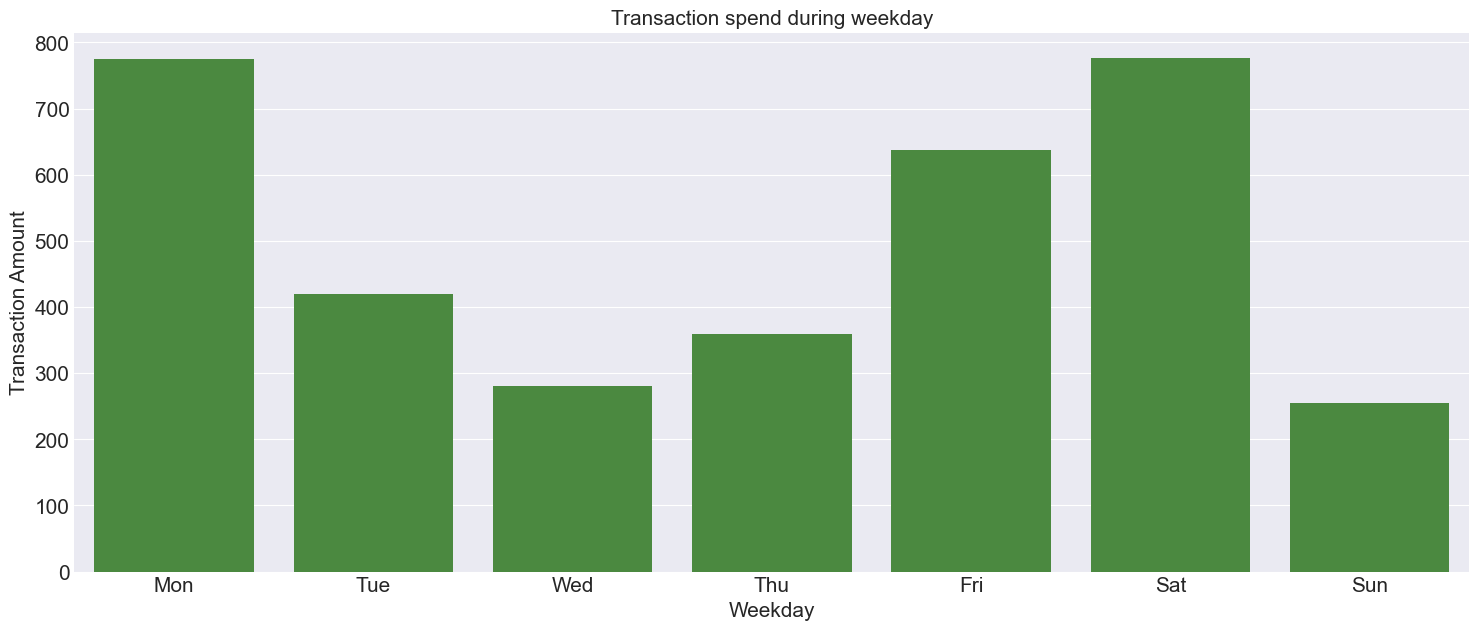

In [35]:
# What day of the week do I spend the most money?
# mpesa color code #439534
plt.figure(figsize=(18, 7))
plt.style.use('seaborn-v0_8-darkgrid')
plot = sns.barplot(data=combined_data,
            x='Weekday',  y='Transaction_amount', color='#439534', errorbar=None,
           )
plt.title('Transaction spend during weekday', fontsize=15)
plt.xlabel('Weekday', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Transaction Amount', fontsize=15)
plt.yticks(fontsize=15)
weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plot.set_xticklabels([weekday_names[i] for i in plot.get_xticks()])
# plt.savefig("ModelCharts/Transaction_spend_during_weekday.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

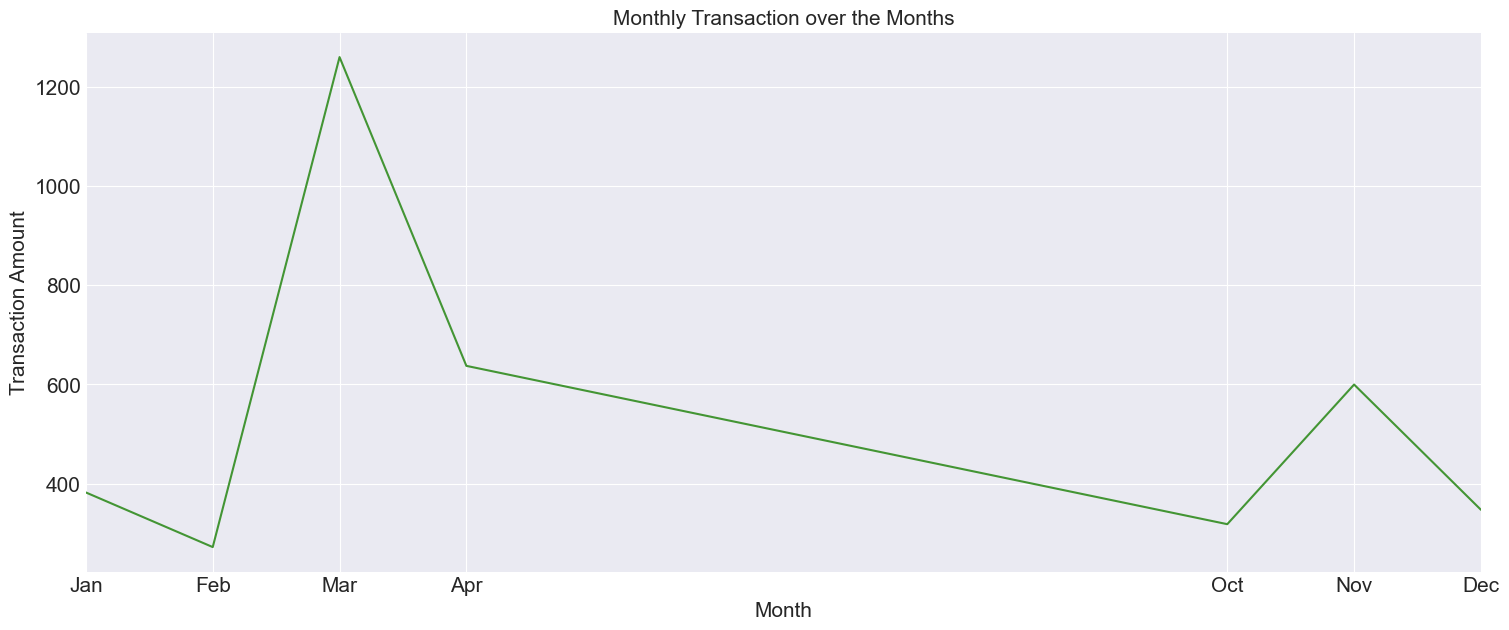

In [36]:
# How does spending vary across different months?
plt.figure(figsize=(18, 7))
plot = sns.lineplot(data=combined_data, x='Month', y='Transaction_amount', color='#439534', errorbar=None)
months_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
existing_months = sorted(combined_data['Month'].unique())
plot.set_xticks(existing_months)
plot.set_xticklabels([months_names[int(i)-1] for i in existing_months])
plot.set_xlim(1, 12)
plt.title("Monthly Transaction over the Months", fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Transaction Amount", fontsize=15)
plt.yticks(fontsize=15)
# plt.savefig("ModelCharts/Monthly_transaction_over_the_months.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

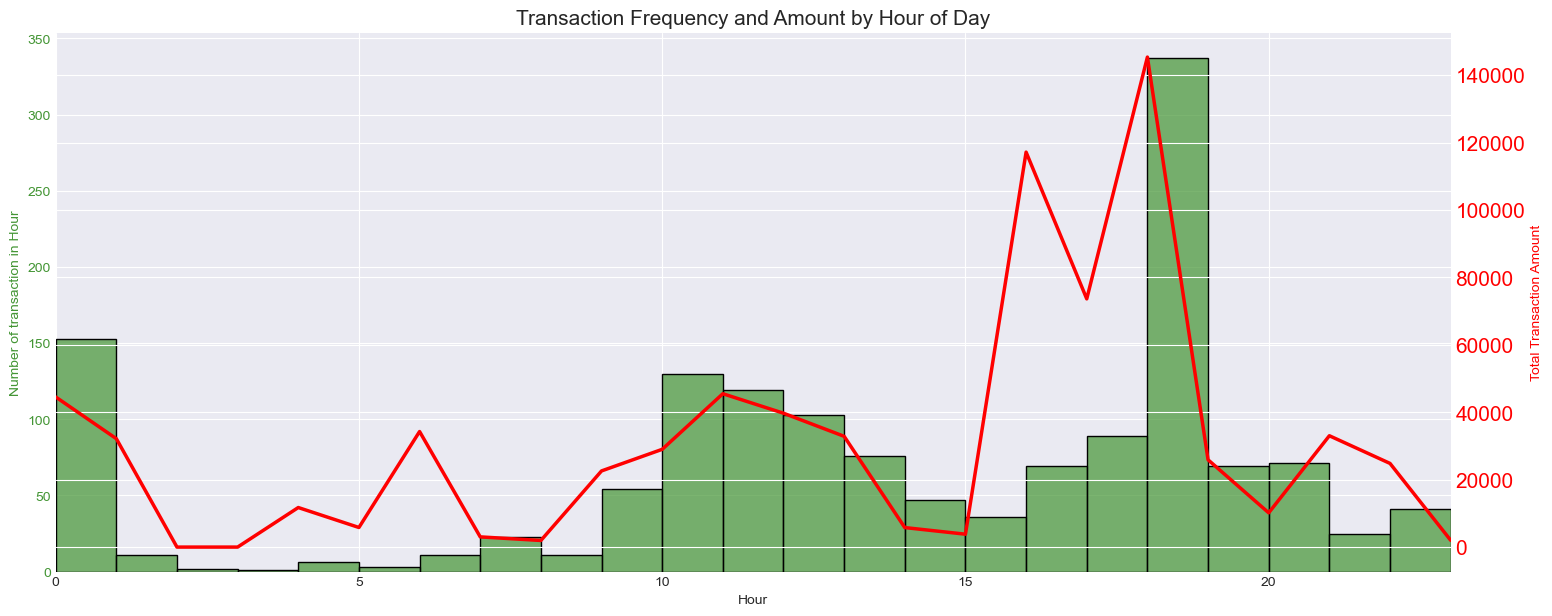

In [37]:
# At what time of day do most transactions happen?
fig, ax1 = plt.subplots(figsize=(18, 7))
sns.histplot(data=combined_data, x='Hour', color='#439534', binwidth=1, alpha=0.7, ax=ax1)
ax1.set_ylabel('Number of transaction in Hour', color='#439534')
ax1.tick_params(axis='y', labelcolor='#439534')
ax1.set_xlim(0, 23)
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=combined_data.groupby('Hour')['Transaction_amount'].sum().reset_index(),x='Hour',y='Transaction_amount',
                   color='red',linewidth=2.5,ax=ax2
                  )
ax2.set_ylabel('Total Transaction Amount', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Transaction Frequency and Amount by Hour of Day', fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel("Hour", fontsize=15)
plt.yticks(fontsize=15)
# plt.savefig("ModelCharts/Transaction_frequency_and_amount_by_hour_of_day.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

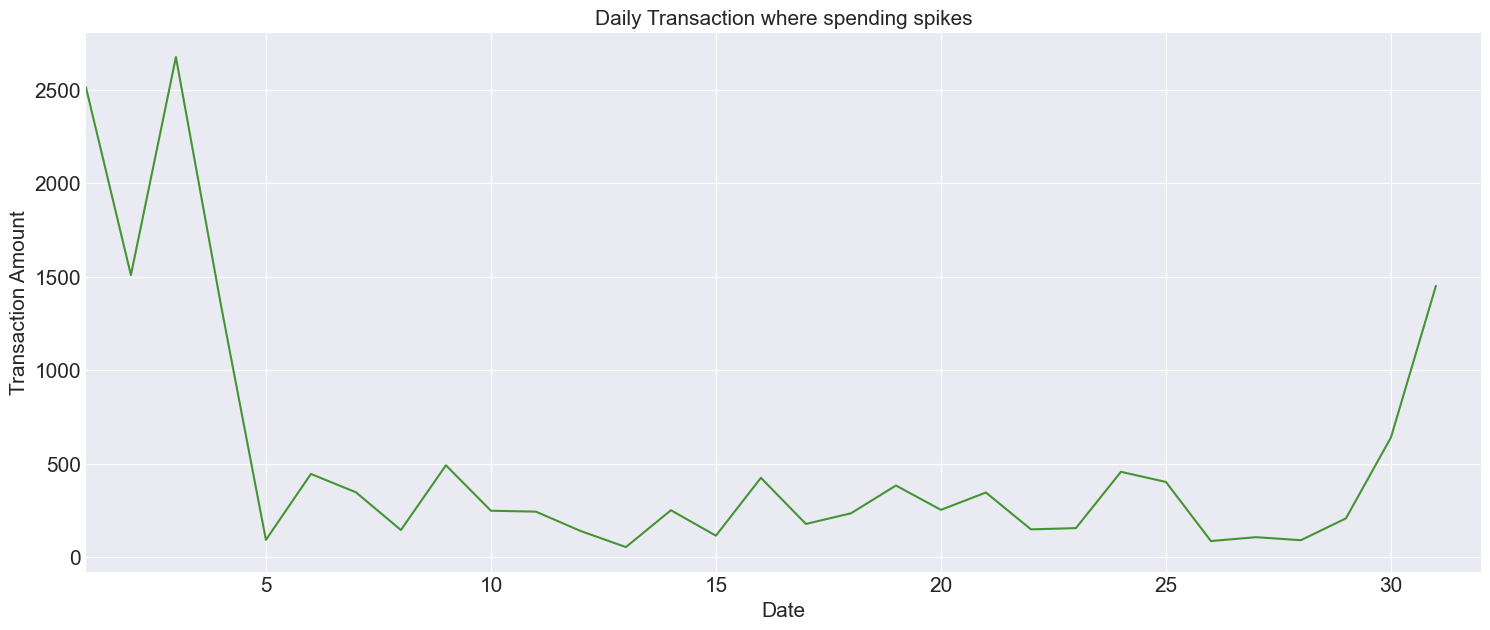

In [38]:
# Is there a particular date where spending spikes?
plt.figure(figsize=(18, 7))
plot = sns.lineplot(data=combined_data, x='Date', y='Transaction_amount', errorbar=None, color='#439534')
plot.set_xlim(1, 32)
plt.title("Daily Transaction where spending spikes", fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Transaction Amount", fontsize=15)
plt.yticks(fontsize=15)
# plt.savefig("ModelCharts/Daily_transction_where_spending_spikes.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

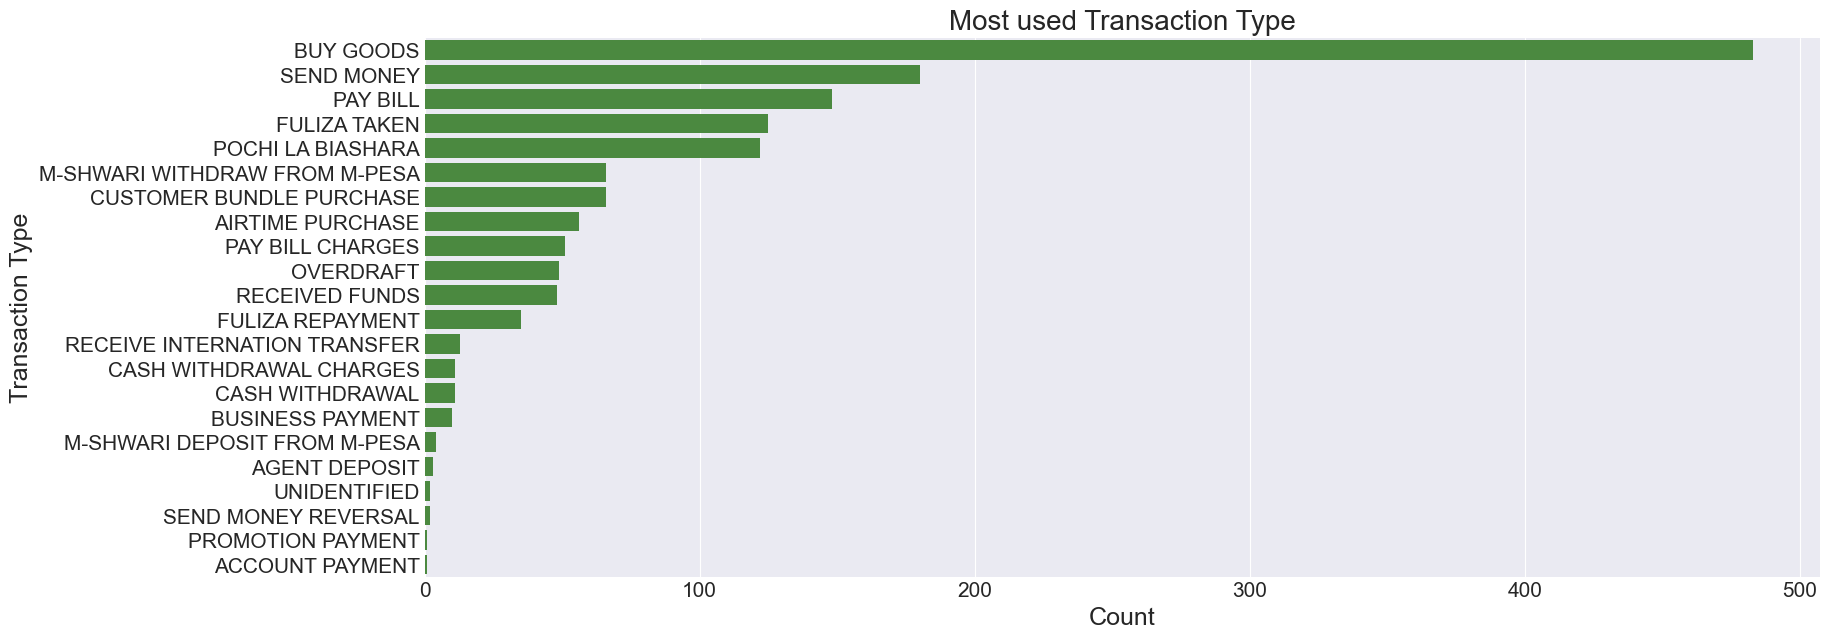

In [39]:
# Which transaction types do I use most?
plt.figure(figsize=(18, 7))
sort = combined_data.sort_values(by='Transaction_type',ascending=False)
sns.countplot(data=combined_data, y='Transaction_type', color='#439534',
             order=combined_data['Transaction_type'].value_counts().index)
plt.title('Most used Transaction Type', fontsize=20)
plt.xlabel('Count', fontsize=18)
plt.xticks(fontsize=15)
plt.ylabel('Transaction Type', fontsize=18)
plt.yticks(fontsize=15)
# plt.savefig("ModelCharts/Most_used_transaction_type.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

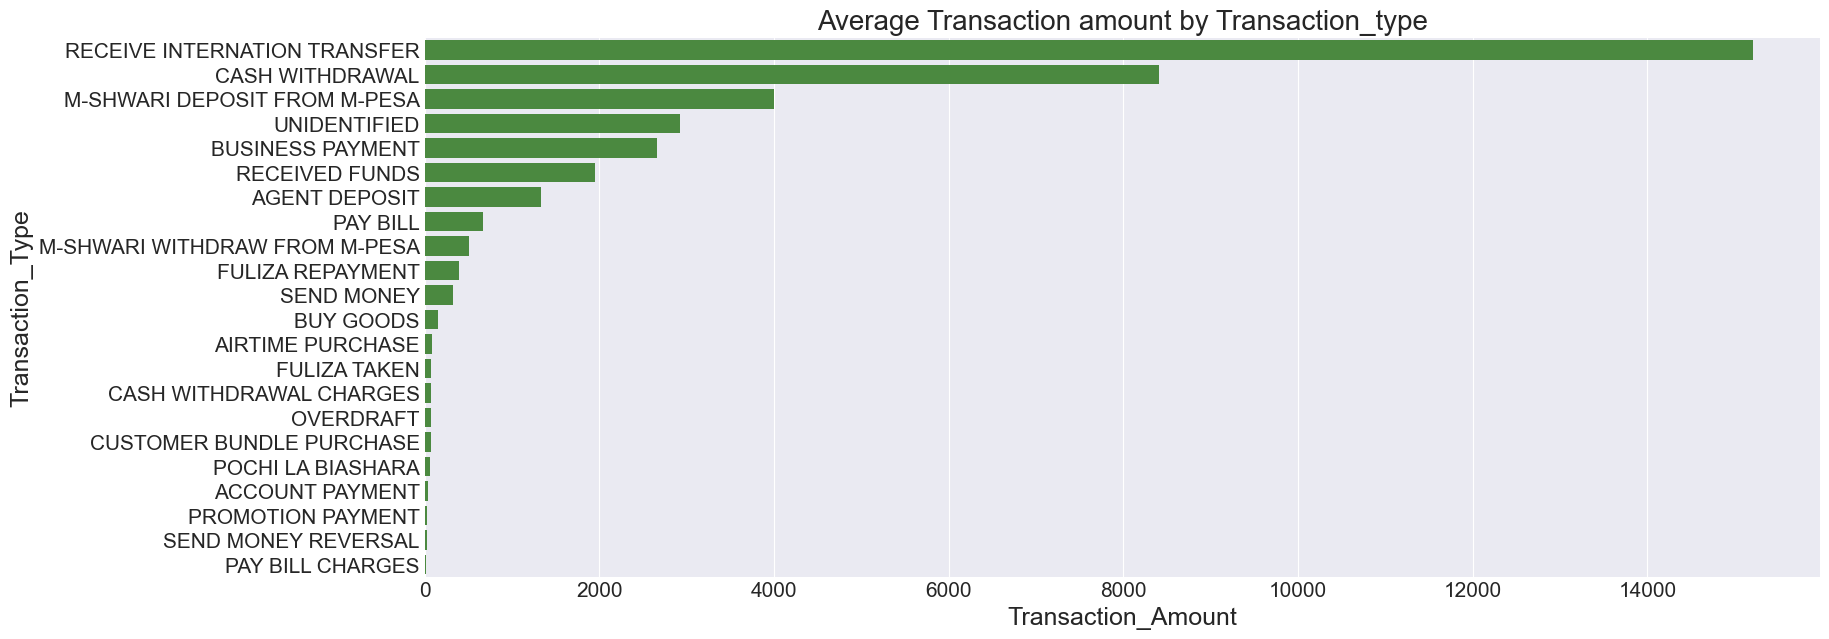

In [40]:
# What’s the average transaction amount by type?
Grouped_avg_type = (combined_data.groupby('Transaction_type')['Transaction_amount']
                    .mean().sort_values(ascending=False).reset_index())

plt.figure(figsize=(18, 7))
sns.barplot(data=Grouped_avg_type, y='Transaction_type', x='Transaction_amount', color='#439534')
plt.title('Average Transaction amount by Transaction_type', fontsize=20)
plt.xlabel('Transaction_Amount', fontsize=18)
plt.ylabel('Transaction_Type', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.savefig("ModelCharts/Average_transaction_amount_by_transaction_type.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [41]:
# # Are there more cash-ins (Paid In) or cash-outs (Withdrawals)?
# paid_in = combined_data['paid_in_or_Withdraw'].value_counts()
# plt.figure(figsize=(15, 7))
# fig = go.Figure(go.Pie(labels=paid_in.index, values=paid_in.values, hole=.5, 
#                       marker_colors = ['#439534', 'red'],
#                       textinfo='percent+label',
#                       hoverinfo='value'))
# fig.update_layout(
#     title_text='(Paid In) vs. (Withdraws)',
#     title_x=0.5,  # Center title
#     showlegend=False,  
#     height=500,
# )
# fig.show()
# fig.write_image("ModelCharts/(Paid_in)vs(withdraws).png", scale=3)

In [42]:
!pip install nbformat

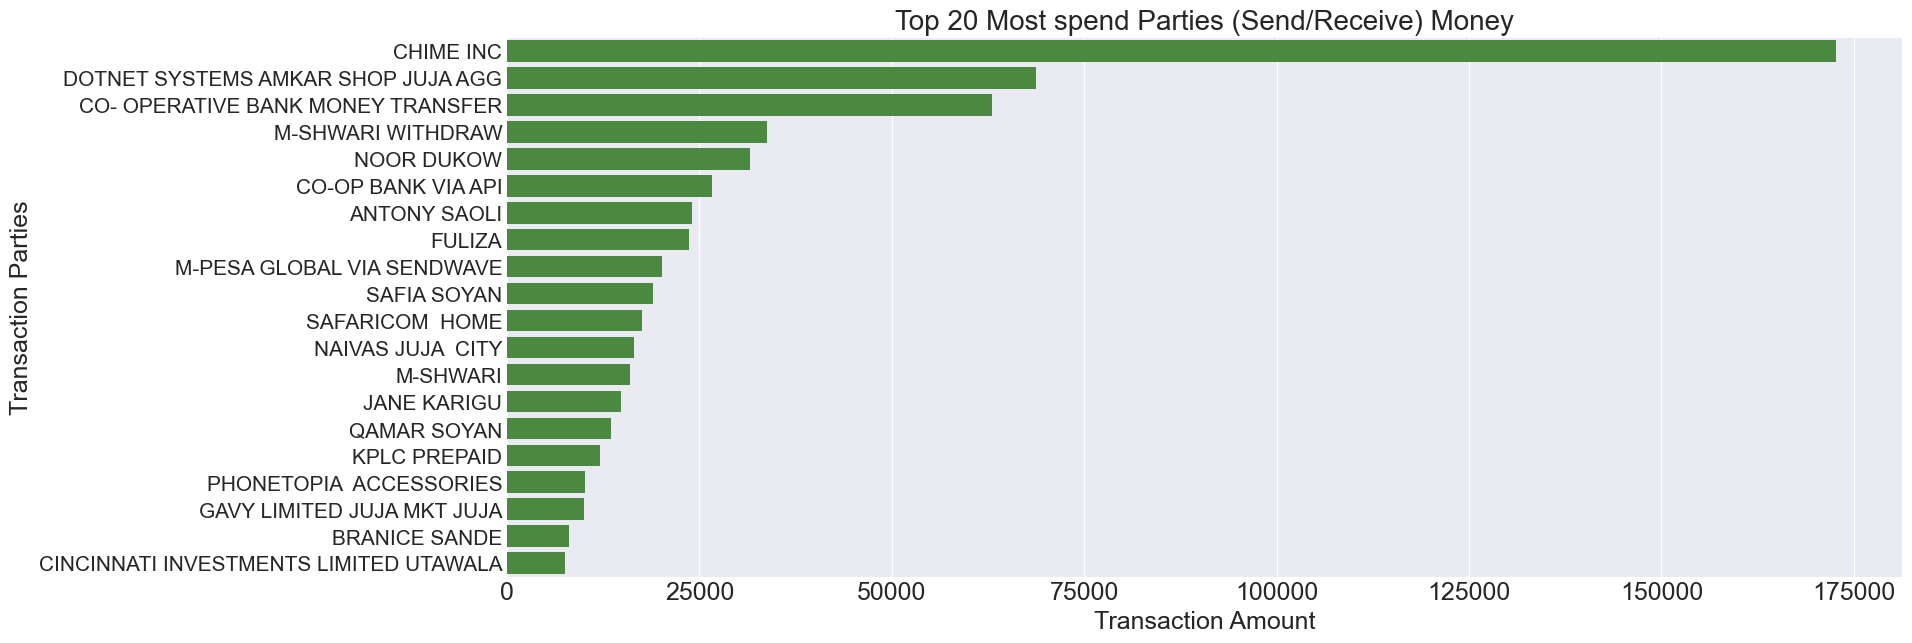

In [43]:
# Which parties do I send/receive money to/from the most?
plt.figure(figsize=(18,7))
top_Parties = (combined_data.groupby('Transaction_party')['Transaction_amount']
               .sum().sort_values(ascending=False).head(20).reset_index())
sns.barplot(data=top_Parties,
           x='Transaction_amount',
           y='Transaction_party',
           color='#439534')
plt.title('Top 20 Most spend Parties (Send/Receive) Money', fontsize=20)
plt.xlabel('Transaction Amount', fontsize=18)
plt.ylabel('Transaction Parties', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=15)
# plt.savefig("ModelCharts/Top20_most_spend_parties(send_receive)_money.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

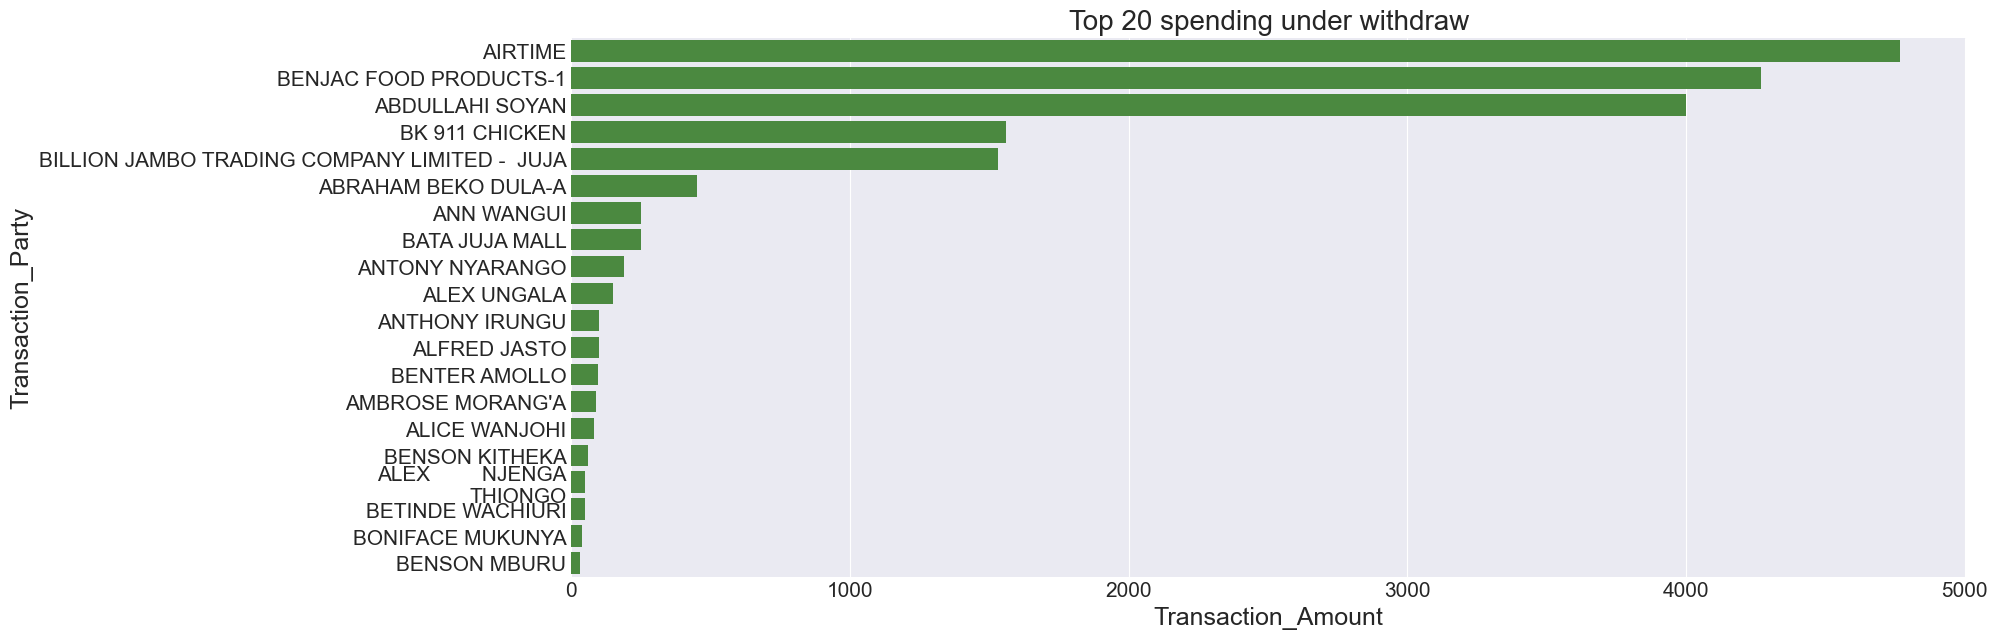

In [44]:
# Who do I spend the most money on
plt.figure(figsize=(18,7))
filtered = combined_data[combined_data["paid_in_or_Withdraw"] == "WITHDRAW"]
spend_most_money = (filtered.groupby("Transaction_party")["Transaction_amount"]
                    .sum().head(20).sort_values(ascending=False).reset_index())
sns.barplot(data=spend_most_money, x="Transaction_amount", y="Transaction_party", color="#439534")
plt.title("Top 20 spending under withdraw", fontsize=20)
plt.xlabel("Transaction_Amount", fontsize=18)
plt.ylabel("Transaction_Party", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.savefig("ModelCharts/top20_spending_under_withdraw.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

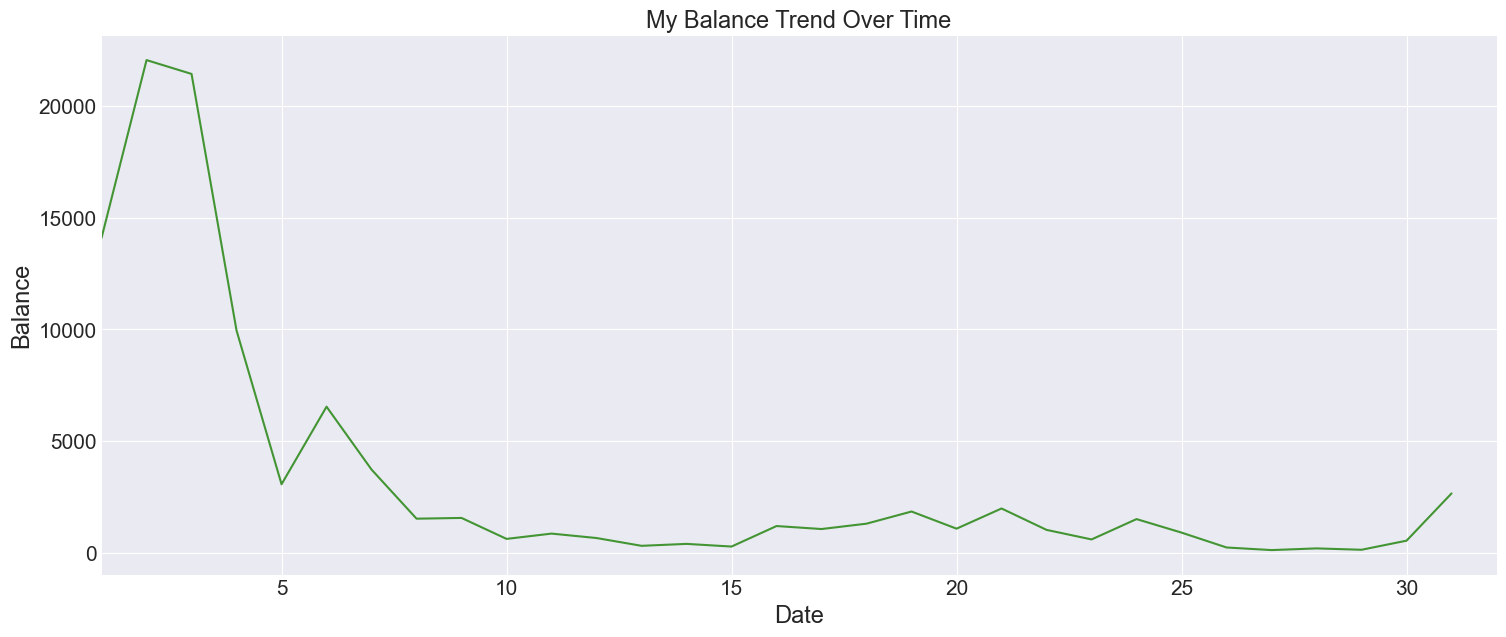

In [45]:
# What’s my balance trend over time?
plt.figure(figsize=(18,7))
sns.lineplot(data=combined_data, x='Date', y='Balance', color="#439534", errorbar=None)
plt.title("My Balance Trend Over Time", fontsize=17)
plt.xlabel("Date", fontsize=17)
plt.ylabel("Balance", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(1,32)
# plt.savefig("ModelCharts/My_balance_trend_over_time.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

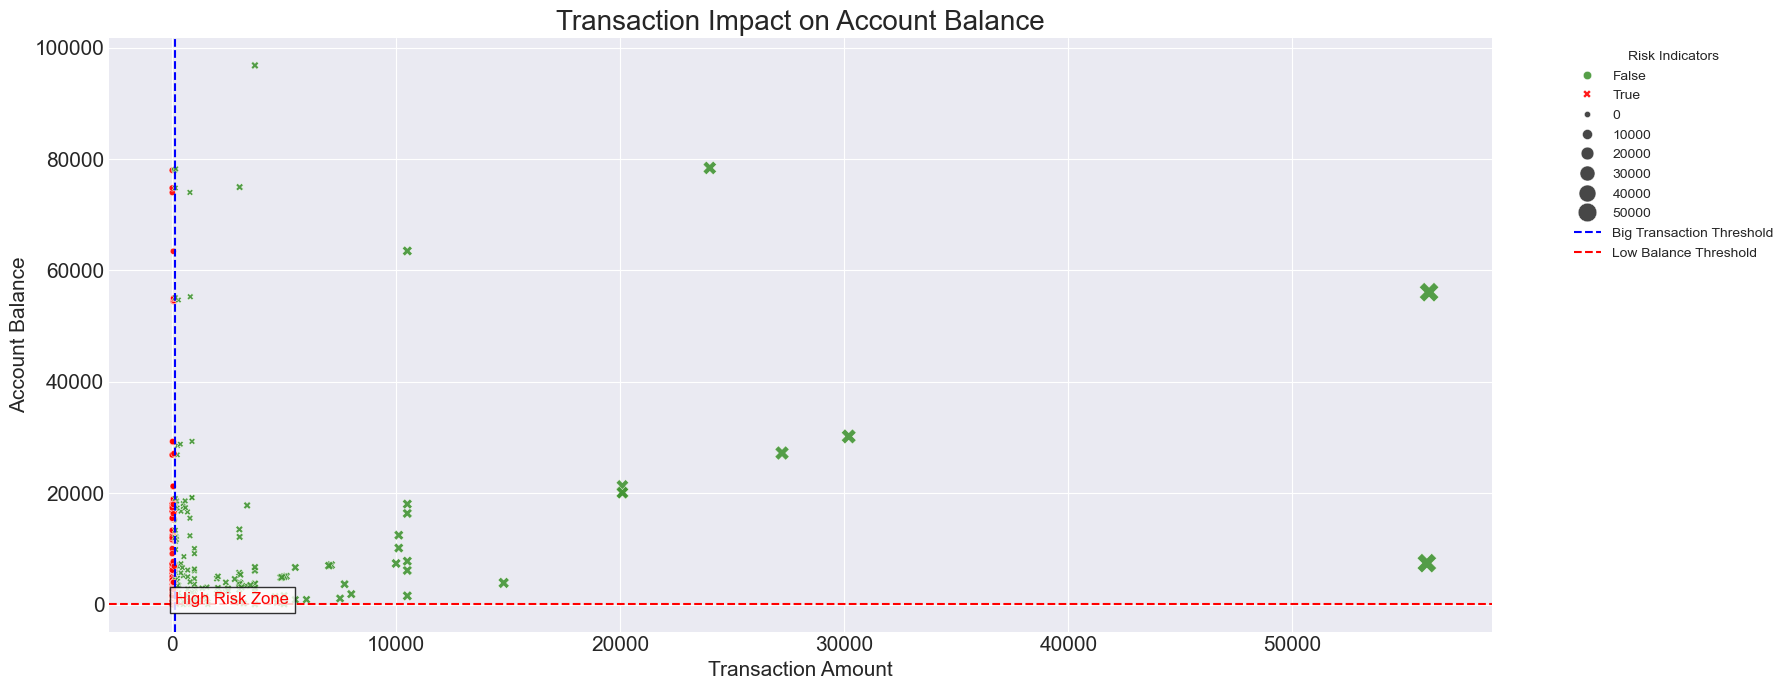

In [46]:
# Do larger transactions lead to lower account balances?
plt.figure(figsize=(18,7))
Low_balance = 100
big_transaction = combined_data['Transaction_amount'].quantile(.75)

sns.scatterplot(
    data=combined_data, x='Transaction_amount', y='Balance',
    hue = combined_data['Transaction_amount'] < Low_balance,
    palette={True: 'red', False: "#439534"},
    style=combined_data["Transaction_amount"] > big_transaction,
    markers={True: 'X', False: 'o'},
    size=combined_data['Transaction_amount'],
    sizes=(20, 200),
    alpha=0.9
    )
# Add reference lines
plt.axvline(big_transaction, color='blue', linestyle='--', label='Big Transaction Threshold')
plt.axhline(Low_balance, color='red', linestyle='--', label='Low Balance Threshold')

plt.title('Transaction Impact on Account Balance', fontsize=20)
plt.xlabel('Transaction Amount', fontsize=15)
plt.ylabel('Account Balance', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(title='Risk Indicators', bbox_to_anchor=(1.05, 1), loc='upper left')

#  risk zones
plt.text(
    x=big_transaction*1.1, 
    y=Low_balance*0.5, 
    s='High Risk Zone', 
    color='red',
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8)
)

plt.tight_layout()
# plt.savefig("ModelCharts/Transaction_impact_on_account_balance.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

<h2> Machine learning prediction </h2>

- <h3> <i>Finding insight and Predicting outcome of certain events </i> </h3>

In [47]:
# finding the correlation on the floating/numerical value
# corr = combined_data.select_dtypes(include=float)
# corr.reset_index(inplace=True)
# corr.drop(columns='index', errors='coerce', inplace=True)
combined_data

,transaction_Day,Year,Month,Date,Weekday,Hour,Minute,Seconds,Transaction_type,Transaction_party,Transaction_amount,paid_in_or_Withdraw,Balance
Receipt,,,,,,,,,,,,,
TC17XS3U67,49,2025,3,1,5,15,55,18,SEND MONEY,GIDEON KIPAMET KAIYIAN,0.0,PAID IN,27.00
TC14XHM64C,49,2025,3,1,5,14,49,55,M-SHWARI DEPOSIT FROM M-PESA,M-SHWARI,0.0,PAID IN,107.00
TC11XF54B3,49,2025,3,1,5,14,34,40,RECEIVED FUNDS,SHEILA MERCY NDUSYA,1100.0,PAID IN,1107.00
TC13WSE6N5,49,2025,3,1,5,12,11,53,PAY BILL,TINGG,0.0,PAID IN,7.00
TBS1THWSOL,48,2025,2,28,4,17,50,41,SEND MONEY,NAOMI NYAMBURA MBURU,0.0,PAID IN,17.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
SJ49WDO7A3,1,2024,10,4,4,18,38,59,BUY GOODS,JACKSON MWAURA MUGURO,50.0,WITHDRAW,2330.81
SJ49WC912X,1,2024,10,4,4,18,31,59,BUY GOODS,BK 911 CHICKEN,170.0,WITHDRAW,2380.81
SJ41W9ZSH5,1,2024,10,4,4,18,22,0,BUY GOODS,JUDITH KATHURE MWITI,130.0,WITHDRAW,2550.81


In [48]:
corr = combined_data.select_dtypes(include=float)
corr.reset_index(inplace=True)
corr.drop(columns='Receipt', errors='coerce', inplace=True)


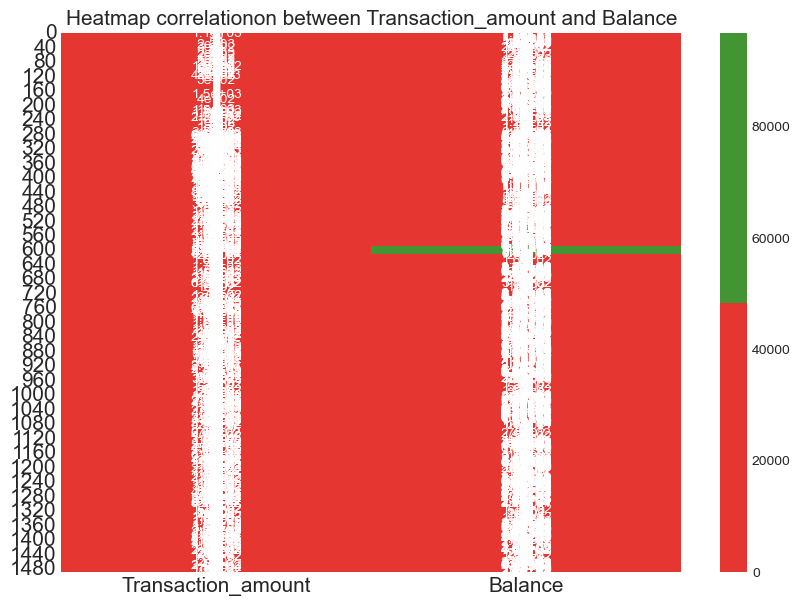

In [49]:
# corr = corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(data=corr, annot=True, cmap=['#E53631', '#439534'])
plt.title("Heatmap correlationon between Transaction_amount and Balance", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.savefig("ModelCharts/Heatmap_correlation_btwn_transaction_amount_and_balance.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [50]:
prediction_data = combined_data.copy()

In [51]:
# changing certain columns into categories
category_columns = ['Transaction_type', 'Transaction_party', 'paid_in_or_Withdraw']
for columns in category_columns:
    prediction_data[columns] = prediction_data[columns].astype('category')

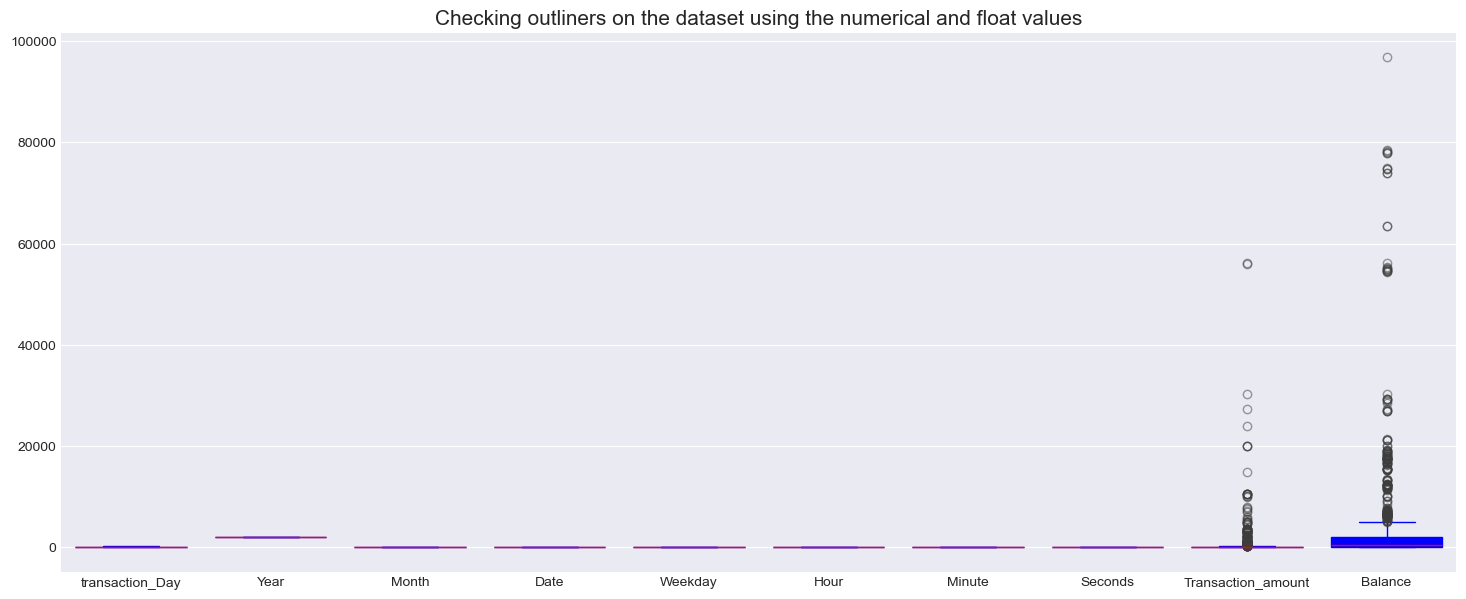

In [52]:
boxcolumns = prediction_data.select_dtypes(include=['int', 'float'])
plt.figure(figsize=(18, 7))
sns.boxplot(data=boxcolumns, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'),
             medianprops=dict(color='red'), whiskerprops=dict(color='blue'), capprops=dict(color='blue'), 
              flierprops=dict(marker='o', color='grey', alpha=0.5))
plt.title("Checking outliners on the dataset using the numerical and float values", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.savefig("ModelCharts/Checking_outliners_on_the_dataset.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [53]:
# function for checking missing values
def missing_values(df: pd.DataFrame):
    missing_percentage = (df.isna().sum() / len(df)) * 100
    missing_df = pd.DataFrame({'Columns': df.columns, "Missing %": missing_percentage})
    missing_df = missing_df[missing_df['Missing %'] > 0].sort_values(by='Missing %', ascending=False)

    return missing_df

In [54]:
# returns no missing values on the prediction_data set
missing_values(prediction_data)

,Columns,Missing %


In [55]:
# checking outliners on the dataset
def check_outliners(df):
    """This function uses the quantile calculation to check outliners on the data
    Parameters used are df for the dataset and the function 
    1.5 threshold is somewhat arbitrary but works well 
    in practice to flag unusual points without being too sensitive.
    returns outliner dataframe"""
    outliners_data = []
    for columns in df.select_dtypes(include=['int', 'float']).columns:
        quant1 = df[columns].quantile(0.25)
        quant3 = df[columns].quantile(0.75)
        IQR = quant3 - quant1

        # compute outliner boundaries
        lowerBoundary = quant1 - 1.5 * IQR
        upperBoundary = quant3 + 1.5 * IQR

        # count the outliners on the dataset
        outliners = df[(df[columns] < lowerBoundary) | (df[columns] > upperBoundary)]
        outliner_count = outliners.shape[0]
        outliner_per = (outliner_count / df.shape[0]) * 100

        # append data to the list
        outliners_data.append({
            'columns':columns,
            'outliner_count': outliner_count,
            'outliner_percentage' : outliner_per,
            'lower Boundary': lowerBoundary,
            'upper Boundary': upperBoundary
        })
    outlinerDf = pd.DataFrame(outliners_data)
    return outlinerDf 

In [56]:
check_outliners(prediction_data)

,columns,outliner_count,outliner_percentage,lower Boundary,upper Boundary
0,transaction_Day,0,0.000000,-76.500,199.500
1,Year,0,0.000000,2022.500,2026.500
2,Month,0,0.000000,-11.500,24.500
3,Date,0,0.000000,-10.500,41.500
4,Weekday,0,0.000000,-5.000,11.000
5,Hour,0,0.000000,-2.000,30.000
6,Minute,0,0.000000,-32.500,83.500
7,Seconds,0,0.000000,-88.500,147.500
8,Transaction_amount,196,13.180901,-139.690,286.150
9,Balance,183,12.306658,-2950.405,5050.675


In [57]:
# dropping outliners
def drop_outliners(df: pd.DataFrame):
    no_outliners = df.copy()
    for columns in df.select_dtypes(include=['int', 'float']).columns:
        q1 = df[columns].quantile(.25)
        q3 = df[columns].quantile(.75)
        IQR = q3 - q1

        lowerbound = q1 - 1.5 * IQR
        upperbound = q3 + 1.5 * IQR

        # replace outliers on the data set
        no_outliners[columns] = df[columns].apply(lambda x : np.nan if (pd.notna(x) and (x < lowerbound or x > upperbound)) else x)
    return no_outliners
        

In [58]:
clean_data = drop_outliners(prediction_data)

In [59]:
missing_values(clean_data)

,Columns,Missing %
Transaction_amount,Transaction_amount,13.180901
Balance,Balance,12.306658


In [60]:
# filling missing values with median value
def fill_na(df):
    return df.fillna(df.median())

In [61]:
clean_data[['Balance', 'Transaction_amount']] = fill_na(clean_data[['Balance', 'Transaction_amount']])

In [62]:
missing_values(clean_data)

,Columns,Missing %


In [63]:
from sklearn.preprocessing import LabelEncoder

def custom_encoder(df: pd.DataFrame, encoding_type: str = 'label', 
                   special_column: str = 'Transaction_party', threshold: int = 10) -> pd.DataFrame:
    df_encoded = df.copy()

    # Select all object or category columns
    category_columns = df_encoded.select_dtypes(include='category').columns

    for col in category_columns:
        # Special case: Transaction_party → encode only frequent senders
        if col == special_column:
            sender_counts = df_encoded[col].value_counts()
            frequent_senders = sender_counts[sender_counts > threshold].index
            df_encoded[col] = df_encoded[col].apply(lambda x: x if x in frequent_senders else 'Other')
            
            label_enc = LabelEncoder()
            df_encoded[col] = label_enc.fit_transform(df_encoded[col].astype(str))
        
        else:
            # Normal encoding
            if encoding_type == 'label':
                label_enc = LabelEncoder()
                df_encoded[col] = label_enc.fit_transform(df_encoded[col].astype(str))
            
            elif encoding_type == 'onehot':
                df_encoded = pd.get_dummies(df_encoded, columns=[col], drop_first=True)
            
            else:
                print(f'Unsupported encoding type for column {col}. Use "label" or "onehot".')
    
    return df_encoded

In [64]:
!pip install scikit-learn

In [65]:
df_encoding = custom_encoder(clean_data, encoding_type='label', special_column='Transaction_party', threshold=15)
df_encoding.sample(20)

,transaction_Day,Year,Month,Date,Weekday,Hour,Minute,Seconds,Transaction_type,Transaction_party,Transaction_amount,paid_in_or_Withdraw,Balance
Receipt,,,,,,,,,,,,,
TBL9X3BDGN,116,2025,2,21,4,18,26,0,4,4,65.00,1,456.78
TBO89QPZWG,52,2025,2,24,0,12,25,1,2,0,200.00,1,220.50
TAT9WKCZQJ,41,2025,1,29,2,10,11,35,2,0,20.00,1,138.71
SKT2LA0RYU,48,2024,11,29,4,18,38,0,8,3,60.00,1,12.91
TBD5UB5S1F,34,2025,2,13,3,10,50,50,4,13,0.00,0,55.00
TAJ9SKLV7R,10,2025,1,19,6,20,38,9,4,13,0.00,0,1167.00
TAH0HNLV08,8,2025,1,17,4,11,5,17,15,13,0.00,0,15.00
SLG8P9TGNQ,65,2024,12,16,0,0,0,0,12,2,65.00,0,65.00
TAN36WOSXZ,14,2025,1,23,3,7,9,40,13,17,0.00,0,695.00


In [70]:
# splitting the dataset into training and testing
x = df_encoding[['Transaction_amount']]
y = df_encoding['Transaction_amount']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [71]:
# scaling the values
from sklearn.preprocessing import StandardScaler, MinMaxScaler
def get_scaler(scaling_type: str = 'standard'):
    if scaling_type == 'standard':
        return StandardScaler()
    elif scaling_type == 'minmax':
        return MinMaxScaler()
    else:
        raise ValueError('Unsupported scaler, use standard or minmax')
def scale_train_test(x_train, x_test, scaling_type='standard'):
    scaler = get_scaler(scaling_type)
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    return x_train_scaled, x_test_scaled, scaler

In [72]:
x_train_scaled, x_test_scaled, scaler = scale_train_test(x_train, x_test, scaling_type='standard' )

In [73]:
# # saving the model to file 
# import pickle

# # with open('ModelsPrediction/scaler.pkl', 'wb') as f:
# #     pickle.dump(scaler, f)

# with open('ModelsPrediction/df_encoding.pkl', 'wb') as f:
#     pickle.dump(df_encoding, f)

FileNotFoundError: [Errno 2] No such file or directory: 'ModelsPrediction/df_encoding.pkl'

In [74]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(x_train_scaled, y_train)

# saving the model
# with open('ModelsPrediction/Mpesa_LinearRegression.pkl', 'wb') as f:
#     pickle.dump(model_lr, f)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [75]:
y_pred = model_lr.predict(x_test_scaled)

In [76]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, f1_score, precision_score, confusion_matrix, roc_auc_score, recall_score, classification_report

mse = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regression Metrics")
print()
print(f"Root mean square Error {rmse:.2f}")
print(f"Mean Absolute Error {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

Regression Metrics

Root mean square Error 0.00
Mean Absolute Error 0.00
R2 Score: 1.00


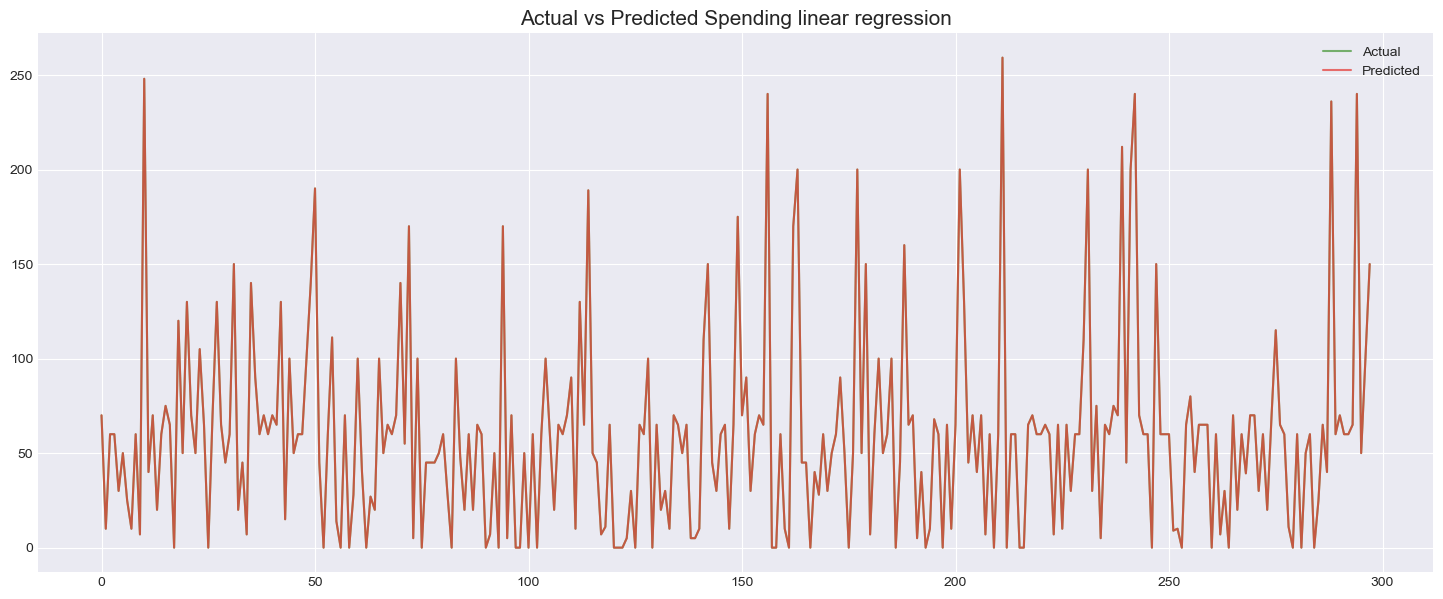

In [77]:
# visualizing the model
plt.figure(figsize=(18, 7))
plt.plot(y_test.values, label='Actual', alpha=0.7, color='#439534')
plt.plot(y_pred, label='Predicted', alpha=0.7, color='#E53631')
plt.legend()
plt.title("Actual vs Predicted Spending linear regression", fontsize=15)
# plt.savefig("ModelCharts/Actual_vs_predicted_spending_linear_regression.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [78]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
rf.fit(x_train_scaled, y_train)

# with open('ModelsPrediction/Mpesa_RandomForestRegression.pkl', 'wb') as f:
#     pickle.dump(rf, f)

,n_estimators,200
,criterion,'squared_error'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [79]:
y_pred_rf = rf.predict(x_test_scaled)

In [80]:
# Evaluate the  Random Forest model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest")
print()
print(f"Root Mean Square Error: {rmse_rf:.2f}") 
print(f"Mean Absolute Error: {mae_rf:.2f}")
print(f"R²: {r2_rf:.2f}")

Random Forest

Root Mean Square Error: 0.95
Mean Absolute Error: 0.15
R²: 1.00


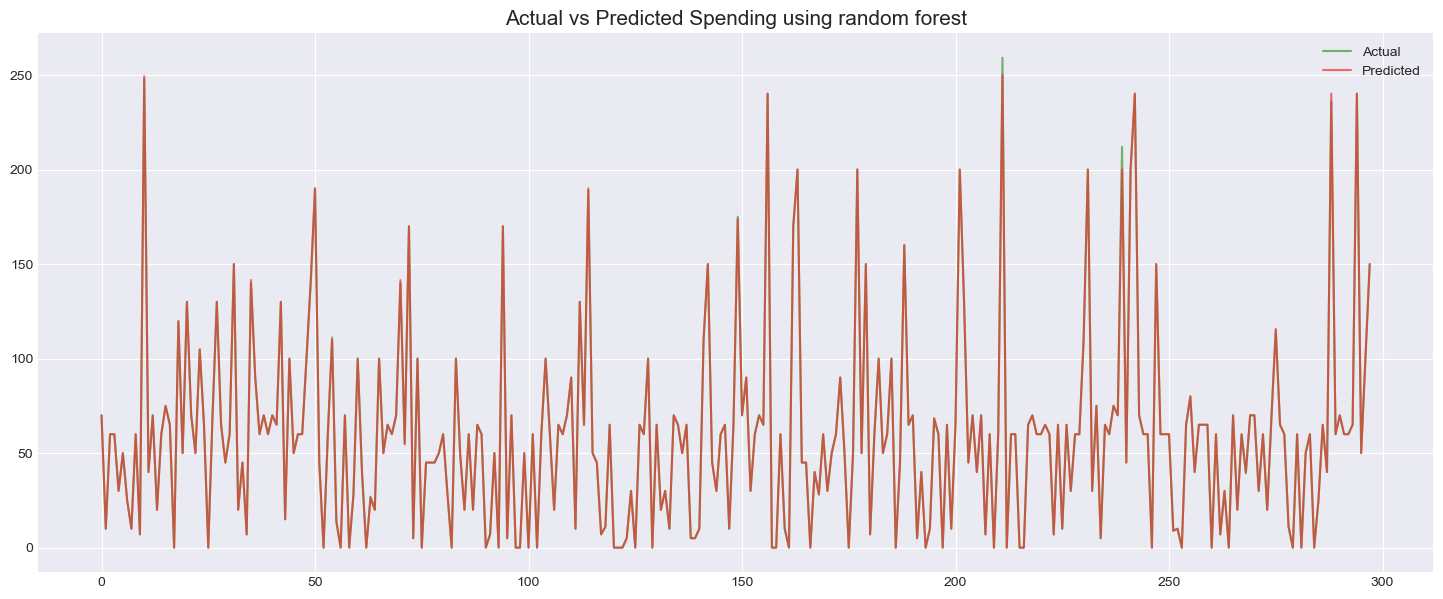

In [81]:
# visualizing the model
plt.figure(figsize=(18, 7))
plt.plot(y_test.values, label='Actual', alpha=0.7, color='#439534')
plt.plot(y_pred_rf, label='Predicted', alpha=0.7, color='#E53631')
plt.legend()
plt.title("Actual vs Predicted Spending using random forest", fontsize=15)
# plt.savefig("ModelCharts/Actual_vs_predicted_spending_using_random_forest.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
df_encoded

In [84]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 1.2 MB/s  0:00:021.2 MB/s eta 0:00:01:01


In [85]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators =100, learning_rate = 0.1, max_depth=5,random_state=42)
xgb.fit(x_train_scaled, y_train)

# saving the model

# with open('ModelsPrediction/Mpesa_XGBRegressor.pkl', 'wb') as f:
#     pickle.dump(xgb, f)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [86]:
y_pred_xgb = xgb.predict(x_test_scaled)

In [87]:
# Evaluating the xgboost model
from sklearn.metrics import (
    accuracy_score, 
    precision_score) 
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost")
print()
print(f"Root Mean Square Error: {rmse_xgb:.2f}")
print(f"Mean Absolute Error: {mae_xgb:.2f}")
print(f"R2: {r2_xgb:.2f}")

XGBoost

Root Mean Square Error: 1.28
Mean Absolute Error: 0.19
R2: 1.00


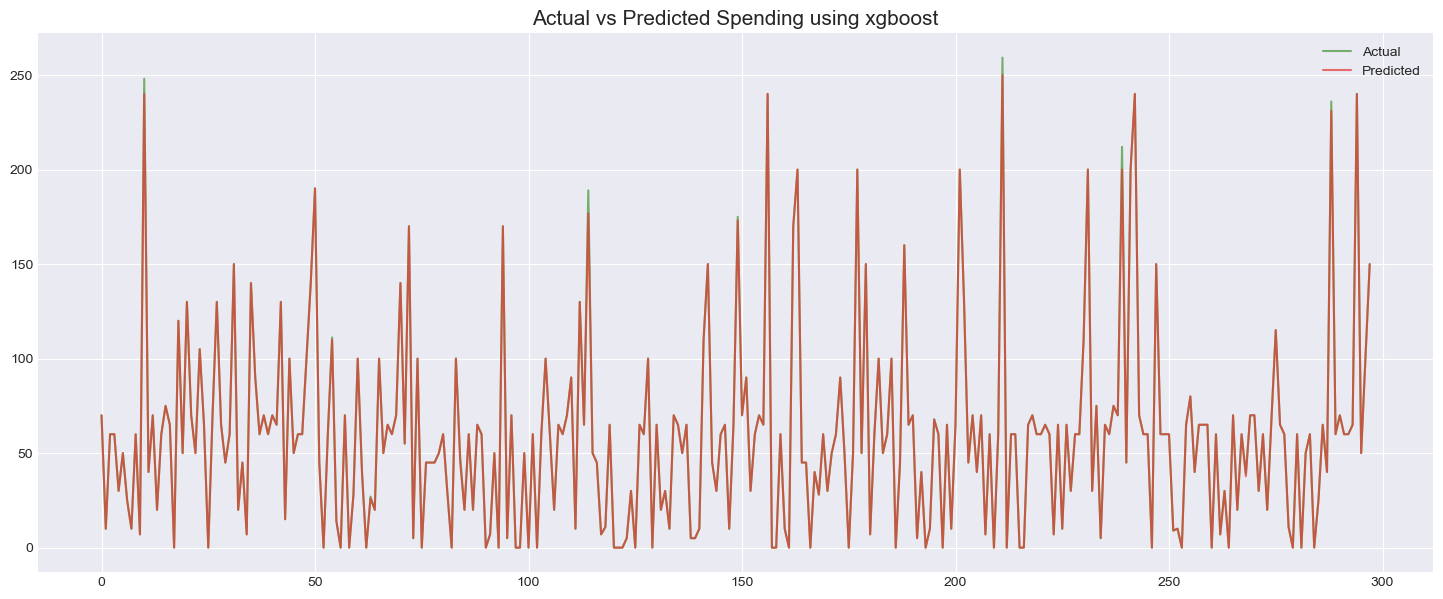

In [88]:
# visualizing the model
plt.figure(figsize=(18, 7))
plt.plot(y_test.values, label='Actual', alpha=0.7, color='#439534')
plt.plot(y_pred_xgb, label='Predicted', alpha=0.7, color='#E53631')
plt.legend()
plt.title("Actual vs Predicted Spending using xgboost", fontsize=15)
# plt.savefig("ModelCharts/Actual_vs_predicted_spending_using_xgboost.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [89]:
# making duplicate data
forecast = combined_data.copy()
forecast.rename(columns={
    "Date": "Day"
} ,inplace=True)

In [90]:
# Forecasting using Prophet
forecast["transation_time"] = pd.to_datetime(forecast[["Year", "Month", "Day", "Hour", "Minute", "Seconds"]])
forecast = forecast.sort_values("transation_time")

daily_df = forecast.groupby(forecast['transation_time'].dt.date)['Transaction_amount'].sum().reset_index()

daily_df.columns = ['ds', 'y']

In [93]:
# using prophet to model
from prophet import Prophet

model_pr = Prophet()
model_pr.fit(daily_df)

# saving the prophet model

# with open('ModelsPrediction/Mpesa_prediction_prophet.pkl', 'wb') as f:
#     pickle.dump(model_pr, f)

13:12:59 - cmdstanpy - INFO - Chain [1] start processing
13:13:03 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
!pip install prophet

In [94]:
future = model_pr.make_future_dataframe(periods=60)
forecast = model_pr.predict(future)

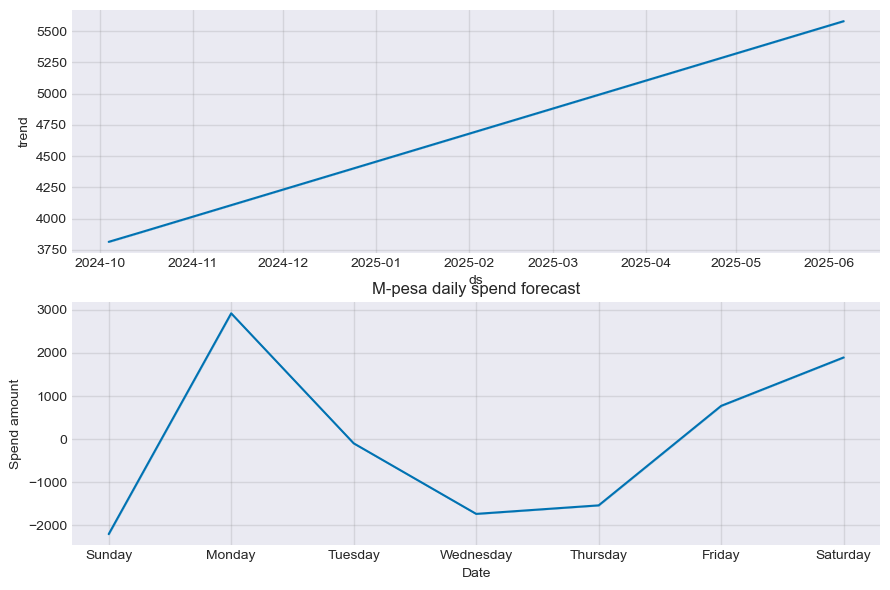

In [95]:
# visualizing the model
fig = model_pr.plot_components(forecast)
# fig = model.plot(forecast)
plt.title("M-pesa daily spend forecast")
plt.xlabel("Date")
plt.ylabel("Spend amount")
# plt.savefig("ModelCharts/mpesa_daily_spending_forecast_using_prophet.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [97]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 1.1 MB/s  0:00:09 eta 0:00:0136m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] 1/2 [statsmodels]


In [98]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(daily_df_arima['y'],
                order=(1, 0, 1),               # Non-seasonal part (p, d, q)
                seasonal_order=(1, 1, 1, 12),  # Seasonal part (P, D, Q, m), m=12 for yearly seasonality
                enforce_stationarity=False,    
                enforce_invertibility=False)

# Fit the SARIMA model
model_fit = model.fit()


# Forecast for the next 60 periods
forecast_sarima = model_fit.forecast(steps=60)
# joblib.dump(model_fit, "ModelsPrediction/Mpesa_prediction_SARIMA")

NameError: name 'daily_df_arima' is not defined

NameError: name 'forecast_sarima' is not defined

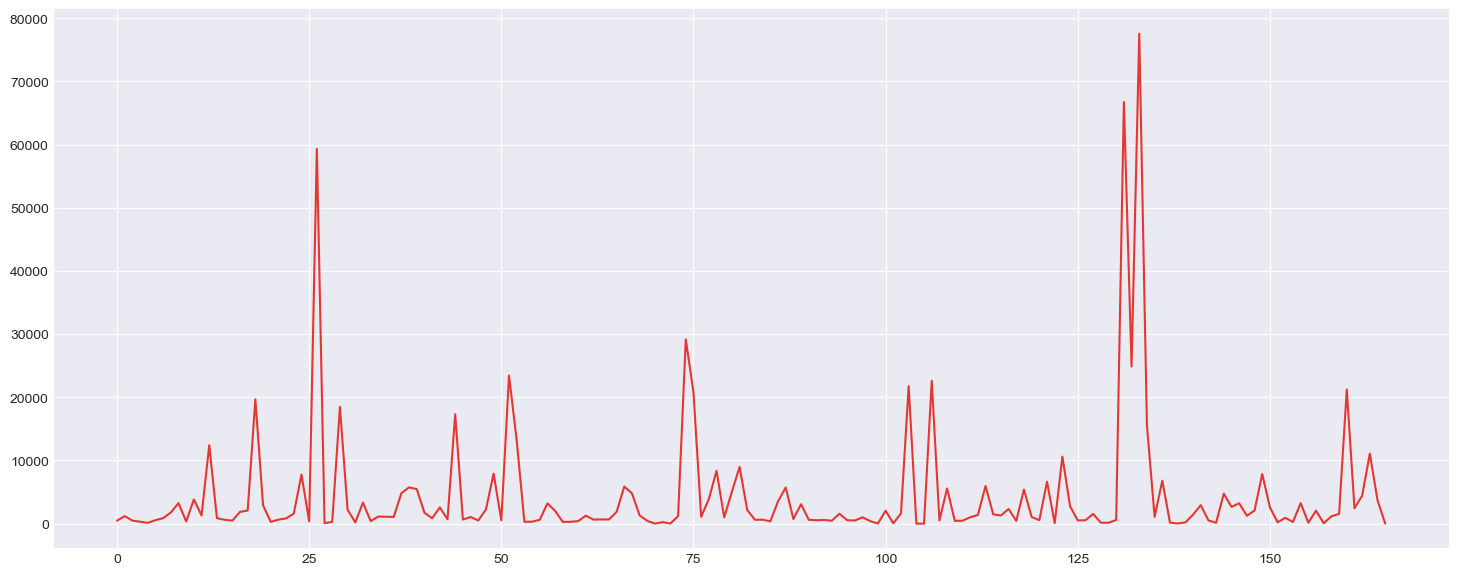

In [99]:
# Visualizing the ARIMA Prediction
plt.figure(figsize=(18, 7))
plt.plot(daily_df.index, daily_df['y'], label='History', color='#E53631')
plt.plot(pd.date_range(daily_df.index[-1], periods=60, freq='D'), forecast_sarima, label='Forecast', color='#439534')
plt.title('M-pesa spending forecast using SARIMA')
plt.legend()
# plt.savefig("ModelCharts/mpesa_spending_forecast_using_SARIMA.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [107]:
df_encoding.columns

Index(['transaction_Day', 'Year', 'Month', 'Date', 'Weekday', 'Hour', 'Minute',
       'Seconds', 'Transaction_type', 'Transaction_party',
       'Transaction_amount', 'paid_in_or_Withdraw', 'Balance'],
      dtype='object')

In [ ]:
combined_data.to_csv("Datasets/Mpesa_cleaned_data.csv")

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model with specified order (example: (1, 0, 1))
model = ARIMA(daily_df_arima['y'], order=(1, 0, 1))

# Fit the model
model_fit = model.fit()

# Forecast for the next 60 periods
forecast_arima = model_fit.forecast(steps=60)

In [101]:
combined_data['Transaction_type'].unique()

array(['SEND MONEY', 'M-SHWARI DEPOSIT FROM M-PESA', 'RECEIVED FUNDS',
       'PAY BILL', 'BUY GOODS', 'POCHI LA BIASHARA',
       'M-SHWARI WITHDRAW FROM M-PESA', 'PAY BILL CHARGES',
       'UNIDENTIFIED', 'AIRTIME PURCHASE', 'CASH WITHDRAWAL CHARGES',
       'CASH WITHDRAWAL', 'BUSINESS PAYMENT', 'AGENT DEPOSIT',
       'PROMOTION PAYMENT', 'FULIZA REPAYMENT',
       'RECEIVE INTERNATION TRANSFER', 'FULIZA TAKEN',
       'CUSTOMER BUNDLE PURCHASE', 'SEND MONEY REVERSAL', 'OVERDRAFT',
       'ACCOUNT PAYMENT'], dtype=object)

In [103]:
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder

# Load your original dataset
data_path = "/Users/briankimanzi/Documents/programmingLanguages/PythonProgramming/JupyterAI/Mpesa prediction/DataSet/Mpesa_cleaned_data.csv"
df = pd.read_csv(data_path)

# Define the columns to encode
categorical_columns = ['Transaction_type', 'Transaction_party', 'paid_in_or_Withdraw']

# Create and fit a LabelEncoder for each column, then save separately
for col in categorical_columns:
    encoder = LabelEncoder()
    df[col] = df[col].astype(str)  # in case any missing values or weird datatypes
    encoder.fit(df[col])

    # Save the encoder
    # encoder_filename = f"/Users/briankimanzi/Documents/programming Languages/PythonProgramming/JupyterNoteBook/ModelsPrediction/{col}_encoder.pkl"
    # with open(encoder_filename, 'wb') as f:
    #     pickle.dump(encoder, f)

    # print(f"Saved encoder for '{col}' at {encoder_filename}")

In [104]:
import pickle
with open("Mpesa_model.pkl", 'wb') as file:
    pickle.dump(combined_data, file)